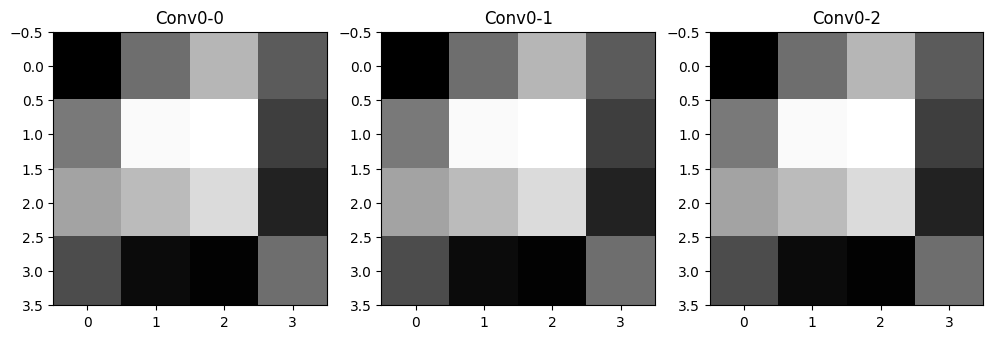

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def conv(a, b):
    c = np.array(a) * np.array(b)
    return np.sum(c)

def MaxPooling(nimg):
    nimg = np.array(nimg)
    i0, j0 = nimg.shape
    i1, j1 = (i0 + 1) // 2, (j0 + 1) // 2
    output = np.zeros((i1, j1))

    if i0 % 2 == 1:
        tmp = np.zeros((1, j0))
        nimg = np.concatenate([nimg, tmp], axis=0)
        i0 += 1

    if j0 % 2 == 1:
        tmp = np.zeros((i0, 1))
        nimg = np.concatenate([nimg, tmp], axis=1)
        j0 += 1

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            a = nimg[2*i:2*i+2, 2*j:2*j+2]
            output[i, j] = np.max(a)
    return output

def featuring(nimg, filters):
    feature = np.zeros((nimg.shape[0]-2, nimg.shape[1]-2))
    for i in range(feature.shape[0]):
        for j in range(feature.shape[1]):
            a = nimg[i:i+3, j:j+3]
            feature[i, j] = conv(a, filters)
    return feature

def Pooling(nimg):
    pool0 = []
    for i in range(len(nimg)):
        pool0.append(MaxPooling(nimg[i]))
    return pool0

def to_img(nimg):
    nimg = np.array(nimg)
    nimg = np.uint8(np.round(nimg / np.max(nimg) * 255))  # normalize for image display
    fimg = []
    for i in range(len(nimg)):
        fimg.append(Image.fromarray(nimg[i]))
    return fimg

def ConvD(nimg, filters):
    feat0 = []
    for i in range(len(filters)):
        feat0.append(featuring(nimg, filters[i]))
    return feat0

def ReLU(f0):
    f0 = np.array(f0)
    return (f0 > 0) * f0

def ConvMax(nimg, filters):
    f0 = ConvD(nimg, filters)
    f0 = ReLU(f0)
    f0 = Pooling(f0)
    return f0, f0

def draw(f0, fg0, size=(12, 8), k=-1):
    plt.figure(figsize=size)
    for i in range(len(f0)):
        plt.subplot(2, len(f0), i+1)
        plt.gca().set_title('Conv' + str(k) + '-' + str(i))
        plt.imshow(f0[i], cmap='gray')
    if k != -1:
        plt.savefig('conv' + str(k) + '.png')

def join(mm):
    mm = np.array(mm)
    m1 = np.zeros((mm.shape[1], mm.shape[2], mm.shape[0]))
    for i in range(mm.shape[1]):
        for j in range(mm.shape[2]):
            for k in range(mm.shape[0]):
                m1[i][j][k] = mm[k][i][j]
    return m1

def ConvDraw(p0, filters, size=(12, 8), k=-1):
    f0, fg0 = ConvMax(p0, filters)
    f0 = to_img(f0)
    fg1 = to_img(fg0)
    draw(f0, fg1, size, k)
    p1 = join(fg0)
    return p1

# Test
nimg31 = np.random.rand(10,10)
filters = [np.ones((3,3))] * 3
m0 = ConvDraw(nimg31, filters, (12, 10), 0)


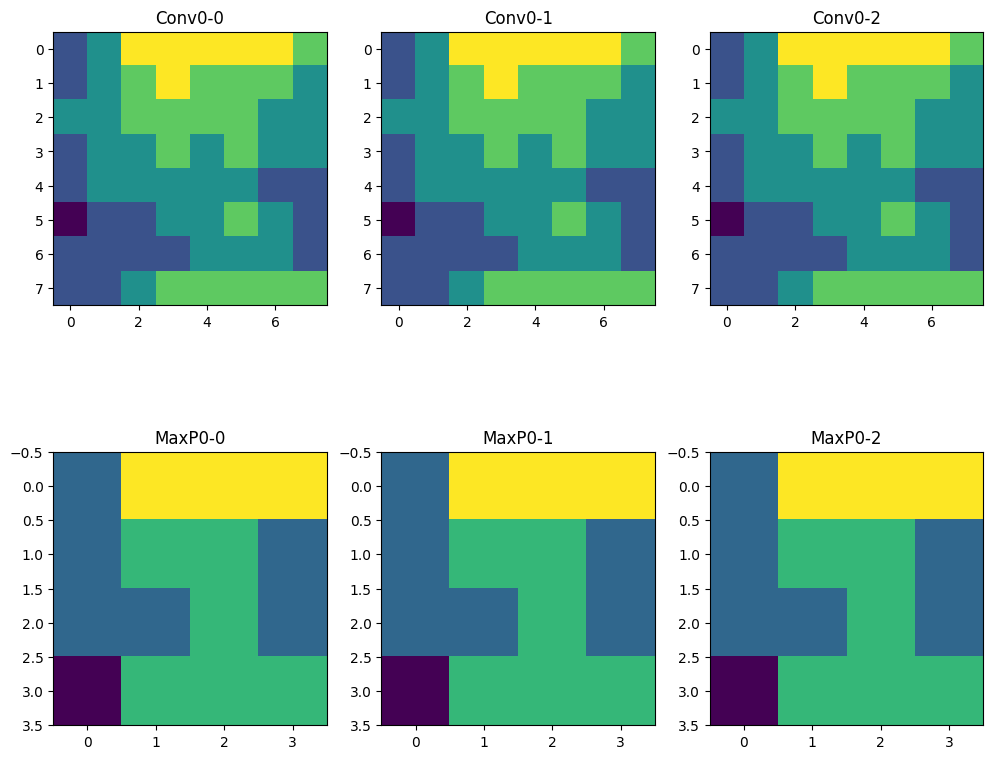

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def conv(a, b):
  c = np.array(a)*np.array(b)
  return np.sum(c)

def MaxPooling(nimg): # 2d input
  nimg = np.array(nimg)
  i0,j0 = nimg.shape # i0=nimg.shape[0], j0 =nimg.shape[1]
  i1 = int((i0+1)/2)
  j1 = int((j0+1)/2)
  output = np.zeros((i1,j1))

  if i0%2 == 1:
    i0 += 1
    tmp = np.zeros((1, j0))
    nimg = np.concatenate([nimg, tmp], axis=0)

  if j0%2 == 1:
    j0 += 1
    tmp = np.zeros((i0, 1))
    nimg = np.concatenate([nimg, tmp], axis=1)

  for i in range(output.shape[0]):
    for j in range(output.shape[1]):
      a= np.array(nimg[2*i:2*i+2, 2*j:2*j+2])
      output[i,j] = a.max()
  return output

def featuring(nimg,filters): # 2d
  feature = np.zeros((nimg.shape[0]-2,nimg.shape[1]-2))
  for i in range(feature.shape[0]):
    for j in range(feature.shape[1]):
      a = nimg[i:i+3, j:j+3, ]
      feature[i,j] = conv(a,filters)
  return feature

def Pooling(nimg):
  nimg = np.array(nimg)
  pool0 = []
  for i in range(len(nimg)):
    pool0.append(MaxPooling(nimg[i]))
  return pool0

def to_img(nimg):
  nimg = np.array(nimg)
  nimg = np.uint8(np.round(nimg))
  fimg = []
  for i in range(len(nimg)):
    fimg.append(Image.fromarray(nimg[i]))
  return fimg

def ConvD(nimg, filters):
  nimg = np.array(nimg)
  feat0 = []
  for i in range(len(filters)):
    feat0.append(featuring(nimg,filters[i]))
  return feat0

def ReLU(f0):
  f0 = np.array(f0)
  f0 = (f0>0)*f0
  return f0

def ConvMax(nimg, filters):
  nimg = np.array(nimg)
  f0 = ConvD(nimg, filters)
  f0 = ReLU(f0)
  fg = Pooling(f0)
  return f0, fg

def draw(f0, fg0, size = (12, 8), k=-1): # size와 k는 기본값 설정
  plt.figure(figsize = size)

  for i in range(len(f0)):
    plt.subplot(2, len(f0), i+1)
    plt.gca().set_title('Conv'+str(k)+'-'+str(i))
    plt.imshow(f0[i])

  for i in range(len(fg0)):
    plt.subplot(2, len(fg0), len(f0)+i+1)
    plt.gca().set_title('MaxP'+str(k)+'-'+str(i))
    plt.imshow(fg0[i])

  if k!=-1: # k=-1이 아니면 그림을 저장
    plt.savefig('conv'+str(k)+'.png')

def join(mm):
  mm = np.array(mm)
  m1 = np.zeros((mm.shape[1], mm.shape[2], mm.shape[0]))
  for i in range(mm.shape[1]):
    for j in range(mm.shape[2]):
      for k in range(mm.shape[0]):
        m1[i][j][k] = mm[k][i][j]
  return m1

def ConvDraw(p0, filters, size=(12, 8), k=-1):  # filters 인자를 추가
    f0, fg0 = ConvMax(p0, filters)
    f0 = to_img(f0)
    fg1 = to_img(fg0)
    draw(f0, fg1, size, k)
    p1 = join(fg0)
    return p1


nimg31 = np.random.rand(10,10)
filters = [np.ones((3,3))] *3

m0 = ConvDraw(nimg31, filters, (12, 10), 0)

